In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Pandasdata\\DT_files\\auto_ins.csv")

In [3]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.drop('Customer',axis=1,inplace=True)

In [5]:
df.dtypes

Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [6]:
df.isnull().sum()

Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
df['Country'].value_counts()

US    9134
Name: Country, dtype: int64

In [8]:
# Only USA in Country, No Variance Hence we will drop it
df.drop('Country',axis=1,inplace=True)

In [9]:
for cols in df.columns:
    print(df[cols].value_counts())

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64
Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64
472.686933     6
272.535640     6
575.744226     6
592.672938     6
1216.874492    6
              ..
919.868511     1
287.543239     1
623.430592     1
910.389970     1
816.951398     1
Name: Claim Amount, Length: 8041, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/3/11     178
1/31/11    178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
2/27/11    167
1/5/11     167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/1

In [10]:
for cols in df.columns:
    if df[cols].dtypes =='object':
        print("Column Name is {} and  no of Unique values are {}".format(cols, len(df[cols].value_counts())))
        print()

Column Name is State Code and  no of Unique values are 5

Column Name is State and  no of Unique values are 5

Column Name is Response and  no of Unique values are 2

Column Name is Coverage and  no of Unique values are 3

Column Name is Education and  no of Unique values are 5

Column Name is Effective To Date and  no of Unique values are 59

Column Name is EmploymentStatus and  no of Unique values are 5

Column Name is Gender and  no of Unique values are 2

Column Name is Location Code and  no of Unique values are 3

Column Name is Marital Status and  no of Unique values are 3

Column Name is Policy Type and  no of Unique values are 3

Column Name is Policy and  no of Unique values are 9

Column Name is Claim Reason and  no of Unique values are 4

Column Name is Sales Channel and  no of Unique values are 4

Column Name is Vehicle Class and  no of Unique values are 6

Column Name is Vehicle Size and  no of Unique values are 3



In [11]:
# Let us also drop state code and effective to date
df.drop(columns=["State Code","Effective To Date"],axis=1,inplace=True)

In [12]:
df.head()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


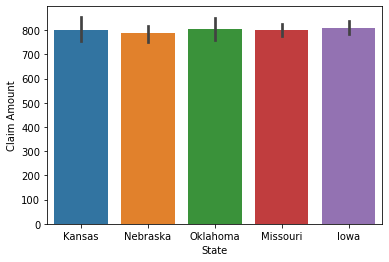

In [13]:
sns.barplot(x="State",y="Claim Amount",data=df)



In [14]:
# Almost equal in all states

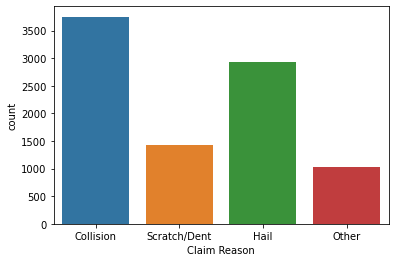

In [15]:
sns.countplot(x="Claim Reason",data=df)

In [16]:
# Collision is the major reason for claiming Insurance 

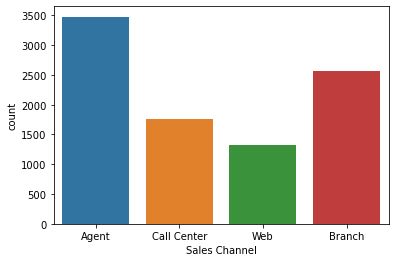

In [17]:
sns.countplot(x="Sales Channel",data=df)

In [18]:
# Claims were more through Agent sales channel

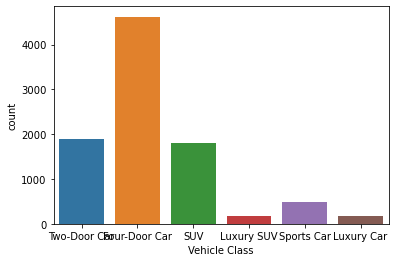

In [19]:
sns.countplot(x="Vehicle Class",data=df)

In [20]:
# Four door car were more in number

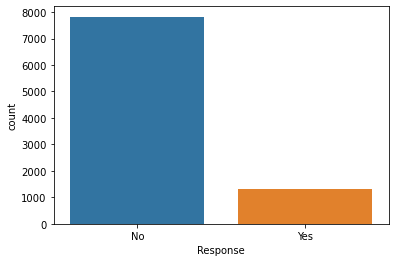

In [21]:
sns.countplot(x="Response",data=df)

In [22]:
df_corr=df.corr()

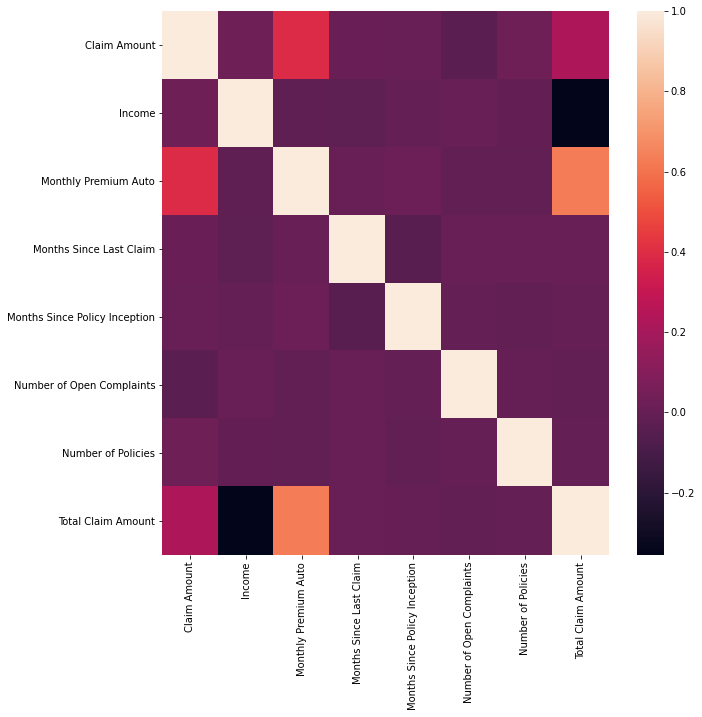

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr)

In [24]:
df.dtypes

State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [25]:
# let us use Label Encoder and encode all object features
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=LabelEncoder().fit_transform(df[col])

In [26]:
df.head()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,276.351928,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,3,697.953590,0,1,0,4,0,0,1,2,...,42,0,8,1,5,3,0,1131.464935,0,1
2,4,1288.743165,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,2,764.586183,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,1,281.369258,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1


In [27]:
x=df.drop('Claim Amount',axis=1)
y=df['Claim Amount']

In [28]:
x.shape

(9134, 21)

In [29]:
y.shape

(9134,)

In [30]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, accuracy_score

In [31]:
ss= StandardScaler()
x=ss.fit_transform(x)

In [32]:
def max_r2_score(algo,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        algo.fit(x_train,y_train)
        y_pred = algo.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
max_r2_score(lr,x,y)

r2 score corresponding to  42  is  0.15480217647429728
r2 score corresponding to  43  is  0.15134553545823592
r2 score corresponding to  44  is  0.1422801951770628
r2 score corresponding to  45  is  0.1566896374144151
r2 score corresponding to  46  is  0.17644761683965915
r2 score corresponding to  47  is  0.18462200342680568
r2 score corresponding to  48  is  0.18515818389994954
r2 score corresponding to  49  is  0.1696764814387075
r2 score corresponding to  50  is  0.1759253276444065
r2 score corresponding to  51  is  0.1273935627714622
r2 score corresponding to  52  is  0.1576631618169705
r2 score corresponding to  53  is  0.15724459308501793
r2 score corresponding to  54  is  0.12718304629191823
r2 score corresponding to  55  is  0.17156498387181907
r2 score corresponding to  56  is  0.15244968857583785
r2 score corresponding to  57  is  0.1459421724403548
r2 score corresponding to  58  is  0.1609805770228926
r2 score corresponding to  59  is  0.14110829553727933
r2 score correspon

87

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
max_r2_score(rf,x,y)

r2 score corresponding to  42  is  0.6846834579610821
r2 score corresponding to  43  is  0.7214732260862239
r2 score corresponding to  44  is  0.676810985226818
r2 score corresponding to  45  is  0.7221486947765372
r2 score corresponding to  46  is  0.6953555534708628
r2 score corresponding to  47  is  0.7290154910026039
r2 score corresponding to  48  is  0.7089067882689809
r2 score corresponding to  49  is  0.7150558791804864
r2 score corresponding to  50  is  0.6985515413326895
r2 score corresponding to  51  is  0.686905507961818
r2 score corresponding to  52  is  0.6741482923163475
r2 score corresponding to  53  is  0.6729160633208375
r2 score corresponding to  54  is  0.6874832488959226
r2 score corresponding to  55  is  0.6914289007333978
r2 score corresponding to  56  is  0.6934467423753288
r2 score corresponding to  57  is  0.6969892723533959
r2 score corresponding to  58  is  0.6990211878988146
r2 score corresponding to  59  is  0.6994061617555221
r2 score corresponding to  60 

47

In [35]:
feature_imp = pd.Series(rf.feature_importances_).sort_values(ascending=False)
feature_imp
topfeatures = pd.DataFrame(feature_imp)
topfeatures.head(10)


,0
13,0.475970
9,0.244029
18,0.044540
10,0.043736
11,0.038308
6,0.031526
3,0.014426
15,0.013953
0,0.012745
16,0.010115


In [36]:
top10=df.iloc[:,[13,9,10,18,11,6,3,15,17,0]]

In [37]:
top10.head()

,Number of Open Complaints,Marital Status,Monthly Premium Auto,Sales Channel,Months Since Last Claim,Gender,Coverage,Policy Type,Claim Reason,State
0,0,1,69,0,32,0,0,0,0,1
1,0,2,94,0,13,0,1,1,3,3
2,0,1,108,0,18,0,2,1,0,4
3,0,1,106,2,18,1,0,0,0,2
4,0,2,73,0,12,1,0,1,0,1


In [38]:
top10.shape

(9134, 10)

In [39]:
x.shape

(9134, 21)

In [40]:
x1=top10

In [41]:
x1

,Number of Open Complaints,Marital Status,Monthly Premium Auto,Sales Channel,Months Since Last Claim,Gender,Coverage,Policy Type,Claim Reason,State
0,0,1,69,0,32,0,0,0,0,1
1,0,2,94,0,13,0,1,1,3,3
2,0,1,108,0,18,0,2,1,0,4
3,0,1,106,2,18,1,0,0,0,2
4,0,2,73,0,12,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
9129,0,1,73,3,18,1,0,1,1,2
9130,0,0,79,1,14,0,1,0,0,2
9131,3,2,85,1,9,1,1,0,0,2
9132,0,1,96,1,34,1,1,1,3,2


In [42]:
x1=ss.fit_transform(x1)

In [43]:
y.shape

(9134,)

In [44]:
max_r2_score(lr,x1,y)

r2 score corresponding to  42  is  0.15480217647429728
r2 score corresponding to  43  is  0.15134553545823604
r2 score corresponding to  44  is  0.14228019517706259
r2 score corresponding to  45  is  0.1566896374144151
r2 score corresponding to  46  is  0.17644761683965915
r2 score corresponding to  47  is  0.18462200342680568
r2 score corresponding to  48  is  0.18515818389994954
r2 score corresponding to  49  is  0.1696764814387075
r2 score corresponding to  50  is  0.1759253276444065
r2 score corresponding to  51  is  0.1273935627714622
r2 score corresponding to  52  is  0.1576631618169705
r2 score corresponding to  53  is  0.15724459308501804
r2 score corresponding to  54  is  0.12718304629191823
r2 score corresponding to  55  is  0.17156498387181907
r2 score corresponding to  56  is  0.15244968857583785
r2 score corresponding to  57  is  0.14594217244035468
r2 score corresponding to  58  is  0.1609805770228926
r2 score corresponding to  59  is  0.14110829553727933
r2 score corresp

87

In [45]:
max_r2_score(rf,x1,y)

r2 score corresponding to  42  is  0.6886608277761233
r2 score corresponding to  43  is  0.7121626506637821
r2 score corresponding to  44  is  0.6764287236294608
r2 score corresponding to  45  is  0.7134982886804135
r2 score corresponding to  46  is  0.6961354438205363
r2 score corresponding to  47  is  0.7267911087503182
r2 score corresponding to  48  is  0.7096598260974607
r2 score corresponding to  49  is  0.7119227047971629
r2 score corresponding to  50  is  0.6968942314299019
r2 score corresponding to  51  is  0.6833270667248073
r2 score corresponding to  52  is  0.6730082395419179
r2 score corresponding to  53  is  0.6763311794031328
r2 score corresponding to  54  is  0.688406429116569
r2 score corresponding to  55  is  0.6947062079351657
r2 score corresponding to  56  is  0.6881042970209874
r2 score corresponding to  57  is  0.6986621174337828
r2 score corresponding to  58  is  0.698031732369406
r2 score corresponding to  59  is  0.7005406512902799
r2 score corresponding to  60 

47

In [46]:
x1

array([[-0.55068994, -0.40882171, -0.73289946, ..., -0.16963969,
         1.49918077, -0.16668206],
       [ 0.97332215, -0.40882171,  0.79199887, ...,  2.400737  ,
        -0.91292371, -0.16668206],
       [ 1.73532819, -0.40882171,  2.31689721, ...,  0.45573376,
         1.49918077, -0.16668206],
       ...,
       [ 0.21131611, -0.40882171,  0.79199887, ...,  1.22793667,
        -0.91292371, -0.16668206],
       [ 0.21131611, -0.40882171,  0.79199887, ...,  0.88511256,
        -0.91292371, -2.0278971 ],
       [ 0.21131611, -0.40882171,  0.79199887, ..., -0.22200449,
         1.49918077, -0.16668206]])

In [47]:
x

array([[-0.55068994, -0.40882171, -0.73289946, ..., -0.16963969,
         1.49918077, -0.16668206],
       [ 0.97332215, -0.40882171,  0.79199887, ...,  2.400737  ,
        -0.91292371, -0.16668206],
       [ 1.73532819, -0.40882171,  2.31689721, ...,  0.45573376,
         1.49918077, -0.16668206],
       ...,
       [ 0.21131611, -0.40882171,  0.79199887, ...,  1.22793667,
        -0.91292371, -0.16668206],
       [ 0.21131611, -0.40882171,  0.79199887, ...,  0.88511256,
        -0.91292371, -2.0278971 ],
       [ 0.21131611, -0.40882171,  0.79199887, ..., -0.22200449,
         1.49918077, -0.16668206]])

In [50]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr=SVR()

parameters={"kernel":["linear", "poly", "rbf"]}
gsv = GridSearchCV(svr, parameters, cv=5,scoring="r2")
gsv.fit(x,y)
gsv.best_params_

{'kernel': 'linear'}

In [51]:
svr =SVR(kernel='linear')
max_r2_score(svr,x,y)

r2 score corresponding to  42  is  0.0691447201786678
r2 score corresponding to  43  is  0.0638399944526451
r2 score corresponding to  44  is  0.054073673867705896
r2 score corresponding to  45  is  0.03924514313633887
r2 score corresponding to  46  is  0.03291943053786317
r2 score corresponding to  47  is  0.07195540092635933
r2 score corresponding to  48  is  0.0863045664530726
r2 score corresponding to  49  is  0.06271468975410599
r2 score corresponding to  50  is  0.0894685186863392
r2 score corresponding to  51  is  -0.003247073614628615
r2 score corresponding to  52  is  0.051637899671886034
r2 score corresponding to  53  is  0.006028728371125336
r2 score corresponding to  54  is  0.032978394385433374
r2 score corresponding to  55  is  0.06802766173585673
r2 score corresponding to  56  is  0.069146081224022
r2 score corresponding to  57  is  0.06019540710290727
r2 score corresponding to  58  is  0.05556985804681669
r2 score corresponding to  59  is  0.026810468377797658
r2 score 

87

In [59]:
from sklearn.ensemble import BaggingRegressor
bgr = BaggingRegressor(max_samples=0.5,max_features=0.8)
max_r2_score(bgr,x,y)

r2 score corresponding to  42  is  0.6472137359565775
r2 score corresponding to  43  is  0.6154631446355966
r2 score corresponding to  44  is  0.6028046011506528
r2 score corresponding to  45  is  0.6153890066985153
r2 score corresponding to  46  is  0.6545459482368371
r2 score corresponding to  47  is  0.675569852942344
r2 score corresponding to  48  is  0.6664195917634972
r2 score corresponding to  49  is  0.6293582935797404
r2 score corresponding to  50  is  0.6434790781100974
r2 score corresponding to  51  is  0.636960869221331
r2 score corresponding to  52  is  0.6257235812108434
r2 score corresponding to  53  is  0.6432319790286207
r2 score corresponding to  54  is  0.6392675377807258
r2 score corresponding to  55  is  0.5314568672268851
r2 score corresponding to  56  is  0.6232155299649123
r2 score corresponding to  57  is  0.656295615856622
r2 score corresponding to  58  is  0.6613989429340003
r2 score corresponding to  59  is  0.6661221505954965
r2 score corresponding to  60  

87

In [62]:
rf=RandomForestRegressor()
parameters={"n_estimators":[100,200],"criterion":['mse','mae']}
gsv = GridSearchCV(rf, parameters, cv=5,scoring="r2")
gsv.fit(x,y)
gsv.best_params_

{'criterion': 'mse', 'n_estimators': 200}

In [63]:
rf=RandomForestRegressor(n_estimators=200)
max_r2_score(rf,x,y)

r2 score corresponding to  42  is  0.6881783289549598
r2 score corresponding to  43  is  0.7171473239620536
r2 score corresponding to  44  is  0.6750689573135413
r2 score corresponding to  45  is  0.7130836824034043
r2 score corresponding to  46  is  0.6950831186234439
r2 score corresponding to  47  is  0.7236632596381762
r2 score corresponding to  48  is  0.7141487901680172
r2 score corresponding to  49  is  0.7199330588631878
r2 score corresponding to  50  is  0.6950440241940307
r2 score corresponding to  51  is  0.6944284473486877
r2 score corresponding to  52  is  0.6736541921729398
r2 score corresponding to  53  is  0.6728027285851763
r2 score corresponding to  54  is  0.681881758313591
r2 score corresponding to  55  is  0.6863814525895628
r2 score corresponding to  56  is  0.688330393291289
r2 score corresponding to  57  is  0.6983832527580166
r2 score corresponding to  58  is  0.6967017153656616
r2 score corresponding to  59  is  0.6994604212438299
r2 score corresponding to  60 

97

In [65]:
rf=RandomForestRegressor(n_estimators=200)
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 97,test_size=0.20)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
print('R2 Score= ', r2_scr)

R2 Score=  0.7337941429115273


In [67]:
import joblib

In [68]:
joblib.dump(rf,"Auto_insur_RF.pkl")

['Auto_insur_RF.pkl']